## Linear Regression with Scikit-Learn

In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.

In [6]:
%%html
<img src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg", width=300, height=200>

### Sample Image for Linear Regression

## Predicting Salary based on years of experience

#### Importing libraries

In [7]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

#### Loading the dataset

In [37]:
dataset = pd.read_csv('/Users/supriodutta/MyFiles/SuprioFiles/JobHunt/Projects/Data/salaryData.csv') 

In [38]:
dataset.shape

(30, 2)

In [39]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [40]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


#### Visualizing the data

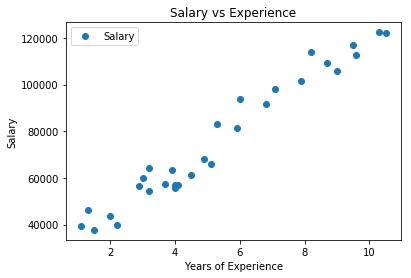

In [41]:
dataset.plot(x='YearsExperience', y='Salary', style='o')  
plot.title('Salary vs Experience')
plot.xlabel('Years of Experience')
plot.ylabel('Salary')
plot.show()

#### Dividing data into train and test sets using 'train_test_split' from sklearn

In [44]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values 

In [45]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

#### Building Linear Regression model using 'LinearRegression' from sklearn

In [49]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
print("Intercept : "+str(regressor.intercept_)+", Coefficient : "+str(regressor.coef_[0]))  

Intercept : 26780.09915062818, Coefficient : 9312.575126729189


#### Predicting for test dataset

In [51]:
y_pred = regressor.predict(X_test) 

In [52]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df  

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


#### Visualising the test set results

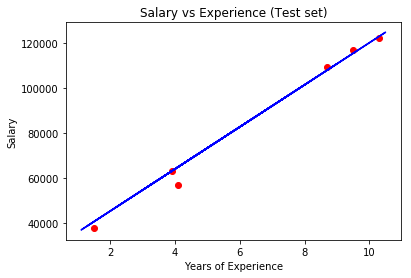

In [64]:

plot.scatter(X_test, y_test, color = 'red')
plot.plot(X_train, linearRegressor.predict(X_train), color = 'blue')
plot.title('Salary vs Experience (Test set)')
plot.xlabel('Years of Experience')
plot.ylabel('Salary')
plot.show()

In [53]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 2446.1723690465055
Mean Squared Error: 12823412.298126549
Root Mean Squared Error: 3580.979237321343


We can see that the value of root mean squared error is 3580.97, which is less than 5% of the mean value of the salary i.e. 76003.0. This means that Linear model did a good job.

#### Getting R-squared & Adjusted R-squared value

In [61]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

In [62]:
import numpy as np
m = y_test
mhat = y_pred
R2 = 1 - np.sum((mhat - m)**2) / np.sum((m - np.mean(m))**2)
R2
n=m.shape[0]
p=X_train.shape[1]
adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))

In [63]:
print("R-Squared: "+str(round(r2,4))+", Adj. R-Squared: "+str(round(adj_rsquared,4)))

R-Squared: 0.9882, Adj. R-Squared: 0.9852
